# Project 1 - Regression - Bonus Part
### Student Name: Yagiz Sezersan
### Student id : 300325049

#### ---------------------------------------------

### - Library import and data preparation

In [41]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

##### a. There is no any index column

In [42]:
# Import dataset that we prepared for lab2
df = pd.read_csv("dataset/Lab02_prepared.csv")
df.head()

,avg_rating,last_updated,lectures,duration,discount,inst_rating,cost,log_enrollment,log_number_ratings,log_inst_review,log_inst_student,business,design,development,it_software,marketing,office_productivity,personal_development,teaching_academics
0,4.2,20.0,162.0,1163.0,90.0,4.2,23.99,10.913833,8.754792,9.507032,12.096855,0,1,0,0,0,0,0,0
1,4.6,18.0,37.0,234.0,56.0,4.5,16.99,10.785994,9.135832,12.413123,13.951623,1,0,0,0,0,0,0,0
2,4.6,20.0,53.0,314.0,91.0,4.6,23.99,9.962652,8.829665,9.903188,10.926334,0,0,1,0,0,0,0,0
3,4.6,20.0,51.0,570.0,88.0,4.6,21.99,13.484116,11.186128,11.228545,13.530335,0,0,1,0,0,0,0,0
4,4.5,20.0,41.0,428.0,88.0,4.5,19.99,9.565915,7.946971,9.386225,10.890423,0,0,0,0,0,1,0,0


##### b. There is no any remaining null values

In [43]:
# Check info about dataset and ensure that there is any null data 
df.info()
print()
df.isnull().sum().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   avg_rating            1904 non-null   float64
 1   last_updated          1904 non-null   float64
 2   lectures              1904 non-null   float64
 3   duration              1904 non-null   float64
 4   discount              1904 non-null   float64
 5   inst_rating           1904 non-null   float64
 6   cost                  1904 non-null   float64
 7   log_enrollment        1904 non-null   float64
 8   log_number_ratings    1904 non-null   float64
 9   log_inst_review       1904 non-null   float64
 10  log_inst_student      1904 non-null   float64
 11  business              1904 non-null   int64  
 12  design                1904 non-null   int64  
 13  development           1904 non-null   int64  
 14  it_software           1904 non-null   int64  
 15  marketing            

0

### - Exploratory Data Analysis


##### a. Statistics summary


In [44]:
# Summary of dataset
df.describe()

,avg_rating,last_updated,lectures,duration,discount,inst_rating,cost,log_enrollment,log_number_ratings,log_inst_review,log_inst_student,business,design,development,it_software,marketing,office_productivity,personal_development,teaching_academics
count,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000
mean,4.429989,19.247374,105.777311,711.383929,78.618697,4.433351,21.368211,9.175319,7.382198,9.324000,11.043686,0.183824,0.076681,0.298319,0.230042,0.036765,0.025210,0.108718,0.040441
std,0.220873,1.289532,100.661688,791.256243,16.429777,0.184889,19.288771,1.358188,1.357295,1.891475,1.820561,0.387442,0.266154,0.457641,0.420970,0.188233,0.156804,0.311367,0.197043
min,3.500000,11.000000,5.000000,30.000000,30.000000,3.800000,7.624600,3.610918,2.890372,3.465736,4.025352,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.300000,19.000000,44.000000,260.750000,74.000000,4.300000,16.990000,8.277406,6.457553,7.928946,9.774229,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.500000,20.000000,74.000000,469.500000,86.000000,4.500000,17.990000,9.170089,7.303842,9.371268,11.074599,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.600000,20.000000,125.000000,854.000000,89.000000,4.600000,21.990000,9.991234,8.175407,10.725358,12.434757,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.900000,20.000000,699.000000,9840.000000,92.000000,4.800000,199.990000,13.922070,12.682012,13.389312,14.589770,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### b. Correlation of features


In [45]:
# Correlation table
df.corr()

,avg_rating,last_updated,lectures,duration,discount,inst_rating,cost,log_enrollment,log_number_ratings,log_inst_review,log_inst_student,business,design,development,it_software,marketing,office_productivity,personal_development,teaching_academics
avg_rating,1.000000,0.018219,0.022501,-0.023934,-0.000337,0.748984,-0.056129,0.347010,0.346894,0.286643,0.223822,-0.030681,0.048463,0.039333,-0.131316,-0.021478,-0.027910,0.124487,0.030074
last_updated,0.018219,1.000000,0.098230,0.107675,0.064725,0.047368,-0.042250,0.002947,0.014023,0.046616,0.032605,-0.011129,0.022788,0.098386,0.041286,-0.000684,-0.015265,-0.150776,-0.074550
lectures,0.022501,0.098230,1.000000,0.763369,-0.023041,0.044914,-0.007925,0.042484,0.054885,0.061280,0.058874,-0.055944,-0.051575,0.220389,-0.018433,-0.029436,-0.050148,-0.105858,-0.057513
duration,-0.023934,0.107675,0.763369,1.000000,-0.000544,0.016353,-0.017859,0.026043,0.036600,0.049687,0.049638,-0.059693,-0.018111,0.222542,-0.018419,-0.035451,-0.060487,-0.124063,-0.057632
discount,-0.000337,0.064725,-0.023041,-0.000544,1.000000,-0.004928,0.037970,0.022388,0.010030,-0.021752,-0.025974,0.081433,-0.006409,-0.019319,-0.044977,-0.012116,0.036777,-0.013258,-0.007246
inst_rating,0.748984,0.047368,0.044914,0.016353,-0.004928,1.000000,-0.028099,0.363823,0.374960,0.393787,0.290219,-0.042348,0.046247,0.058110,-0.129005,-0.033740,-0.019953,0.118631,0.022097
cost,-0.056129,-0.042250,-0.007925,-0.017859,0.037970,-0.028099,1.000000,-0.040278,-0.043410,-0.055462,-0.052095,0.135727,0.011646,-0.138047,-0.060834,-0.009910,-0.009235,0.076095,0.064550
log_enrollment,0.347010,0.002947,0.042484,0.026043,0.022388,0.363823,-0.040278,1.000000,0.933251,0.674879,0.676671,-0.050971,0.001420,0.166620,-0.116514,-0.001674,0.038986,-0.010192,-0.053073
log_number_ratings,0.346894,0.014023,0.054885,0.036600,0.010030,0.374960,-0.043410,0.933251,1.000000,0.640200,0.587318,-0.036175,-0.016093,0.166936,-0.096947,-0.015710,0.054235,-0.033290,-0.063273
log_inst_review,0.286643,0.046616,0.061280,0.049687,-0.021752,0.393787,-0.055462,0.674879,0.640200,1.000000,0.952067,-0.041418,-0.064710,0.217948,-0.015986,-0.044721,0.015079,-0.107893,-0.101981


Text(0.5, 1.0, 'Correlation HeatMap')

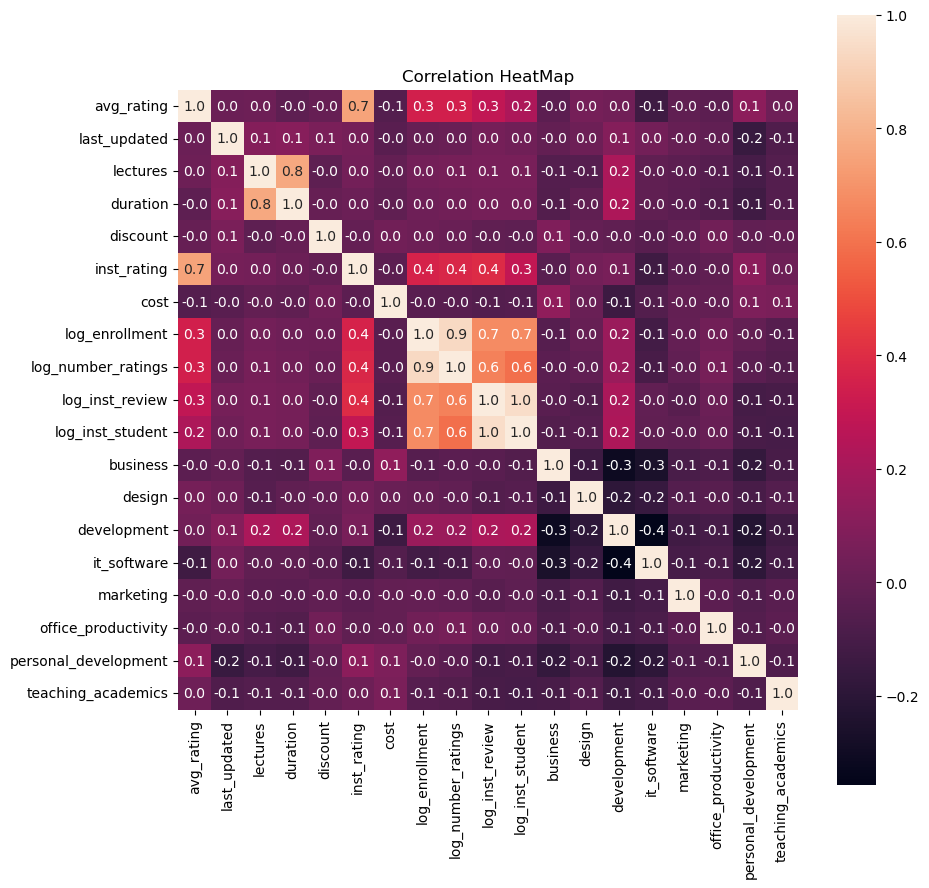

In [46]:
# Use heatmap for correlation
plt.figure(figsize=(10,10))

sns.heatmap(df.corr(),cbar=True,annot=True,square=True,fmt='.1f',annot_kws={'size': 10})
plt.title("Correlation HeatMap")

##### c. Univariate Analysis for log_inst_student
 * Plot for log_inst_student shows that we have left tail
 * We have some outliers from 4 to 7
 * Most of value gathered between 10 and 12
 

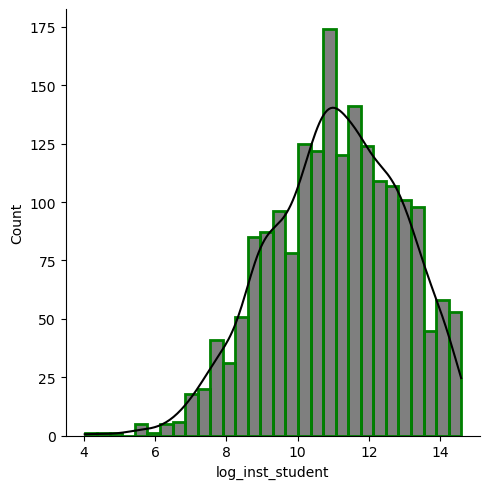

<Axes: >

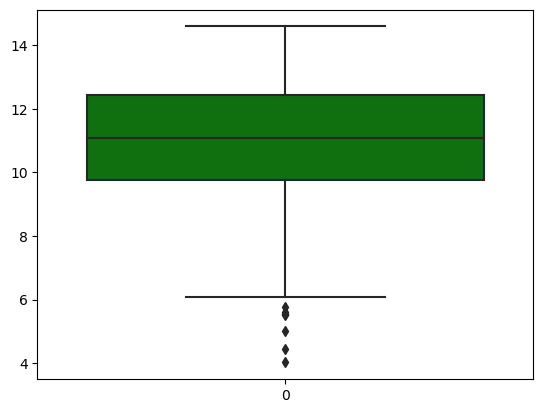

In [47]:
# Distribution plot and boxplot for log_inst_student
sns.displot(df.log_inst_student, color='black',bins=30, kde=True, edgecolor='g', linewidth=2)
plt.show()
sns.boxplot(df.log_inst_student,color='green')

In [48]:
# Find records where log_inst_student is less than 7 then drop related records
filtered_log_inst_student =df[df.log_inst_student < 7].index
print(filtered_log_inst_student)
df.drop(filtered_log_inst_student, inplace = True)

Int64Index([  50,   66,  132,  145,  157,  176,  218,  351,  592,  649,  661,
             669,  687,  824,  908,  995, 1044, 1140, 1154, 1155, 1407, 1436,
            1446, 1463, 1717, 1738, 1800, 1844],
           dtype='int64')


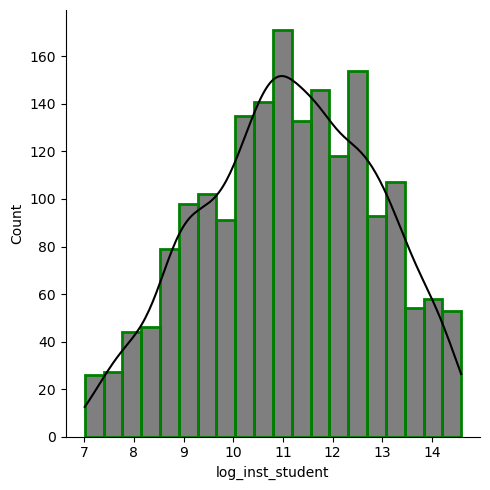

In [49]:
# Display plot again after dropping
sns.displot(df.log_inst_student, color='black',bins=20, kde=True, edgecolor='g', linewidth=2)

##### d. Multivariate Analysis

In [50]:
# To compare avg_rating  
# The highest first two feature is selected as avg_rating and inst_rating
df.corr()["avg_rating"].abs().sort_values(ascending = False)

avg_rating              1.000000
inst_rating             0.746517
log_enrollment          0.346830
log_number_ratings      0.345191
log_inst_review         0.282575
log_inst_student        0.216728
it_software             0.134625
personal_development    0.121367
cost                    0.049909
design                  0.044717
development             0.040406
teaching_academics      0.038873
office_productivity     0.029441
business                0.025395
marketing               0.024216
lectures                0.023389
duration                0.023300
last_updated            0.016860
discount                0.000596
Name: avg_rating, dtype: float64

- Below two variables are the highest correlation each other
- Points are concentrated and form a linear
- There seems a trend so I would say that strong correlation between the two variables

Text(0.5, 28.999999999999986, 'inst_rating')

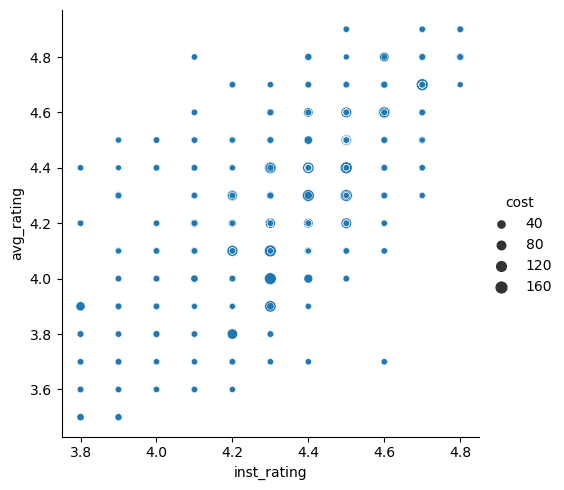

In [51]:
# First analysis between avg_rating and inst_rating
sns.relplot(data=df, x="inst_rating", y= "avg_rating", size="cost")
plt.ylabel('avg_rating')
plt.xlabel('inst_rating')

- Below two variables are the second highest correlation each other
- Points are not perfectly concentrated and form a spread linear

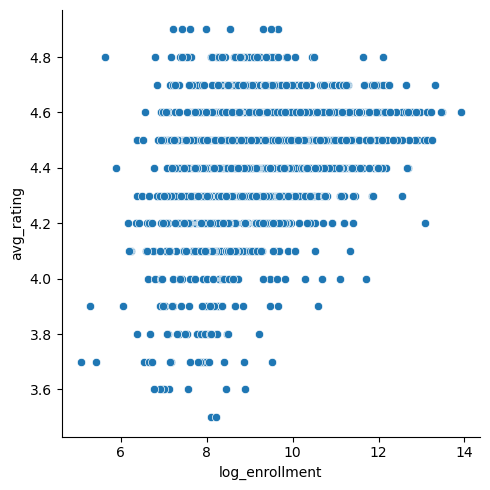

In [52]:
# Second analysis between avg_rating and log_enrollment
sns.relplot(data=df, x="log_enrollment", y= "avg_rating")

#### I would say very poor relationship

##### e. Feature Observation and Hypothesis

Here observation with selecting target feature as "avg_rating"
1. "log_inst_student": The high correlation of 0.94 suggests a strong positive relationship between the logarithm of institutional review scores and the logarithm of the number of students in the institution. This supports the hypothesis that larger institutions may have higher review scores.

2. "log_enrollment": The correlation of 0.64 indicates a positive relationship between the logarithm of institutional review scores and the logarithm of the enrollment size. This aligns with the hypothesis that institutions with a larger enrollment may receive higher review scores.

3. "log_number_ratings": With a correlation of 0.61, there is a positive relationship between the logarithm of institutional review scores and the logarithm of the number of ratings. This suggests that institutions with more ratings tend to have higher review scores, potentially indicating greater popularity or student satisfaction.

### - Feature Selection

##### a. Assign log_inst_review to new dataframe as target 

In [53]:
target = df['avg_rating'].copy()
# Copy dataset
df2 = df.copy()

In [54]:
# Use below code to run functions via another folder
%run functions/Functions_YSe25049.ipynb

##### b. Correlation Based Selection (threshold)

In [55]:
# Assign corr() value
correlation = df2.corr().abs()

# Sort the corr() by avg_rating
correlation_target = correlation['avg_rating'].abs().sort_values(ascending=False)
print(correlation_target)

# Select features with threshold value
selected_features = correlation_target[correlation_target > 0.2].index

# Drop avg_rating
selected_features = selected_features.drop('avg_rating')

# Create a new dataframe as df_correlation
df_correlation = df[selected_features]
df_correlation.head()

avg_rating              1.000000
inst_rating             0.746517
log_enrollment          0.346830
log_number_ratings      0.345191
log_inst_review         0.282575
log_inst_student        0.216728
it_software             0.134625
personal_development    0.121367
cost                    0.049909
design                  0.044717
development             0.040406
teaching_academics      0.038873
office_productivity     0.029441
business                0.025395
marketing               0.024216
lectures                0.023389
duration                0.023300
last_updated            0.016860
discount                0.000596
Name: avg_rating, dtype: float64


,inst_rating,log_enrollment,log_number_ratings,log_inst_review,log_inst_student
0,4.2,10.913833,8.754792,9.507032,12.096855
1,4.5,10.785994,9.135832,12.413123,13.951623
2,4.6,9.962652,8.829665,9.903188,10.926334
3,4.6,13.484116,11.186128,11.228545,13.530335
4,4.5,9.565915,7.946971,9.386225,10.890423


##### c. Variance Threshold Selection

In [56]:
from sklearn.feature_selection import VarianceThreshold

# Import library for VarianceThreshold and since we already assign our target, only drop step is applied
x = df2.drop("avg_rating", axis=1)
    
# Apply the variance threshold method and get selected feature names
vt = VarianceThreshold(threshold=0.4)
vt.fit(x)
pd.DataFrame({'Variance': vt.variances_, 'select_status': vt.get_support()}, index=x.columns)
  
df_variance = x.iloc[:,vt.get_support()]
df_variance.head()

,last_updated,lectures,duration,discount,cost,log_enrollment,log_number_ratings,log_inst_review,log_inst_student
0,20.0,162.0,1163.0,90.0,23.99,10.913833,8.754792,9.507032,12.096855
1,18.0,37.0,234.0,56.0,16.99,10.785994,9.135832,12.413123,13.951623
2,20.0,53.0,314.0,91.0,23.99,9.962652,8.829665,9.903188,10.926334
3,20.0,51.0,570.0,88.0,21.99,13.484116,11.186128,11.228545,13.530335
4,20.0,41.0,428.0,88.0,19.99,9.565915,7.946971,9.386225,10.890423


##### d. Select K-Best method

In [57]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression 
from sklearn.model_selection import train_test_split

# Since we already assign our target, only drop step is applied
features = df2.drop("avg_rating", axis=1)
    
# Select k=num
kbest = SelectKBest(score_func=f_regression, k=8)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

kbest.fit_transform(X_train, y_train)
# Save it to selected features
df_selKBest = features.iloc[:,kbest.get_support()]
df_selKBest.head()

,duration,inst_rating,log_enrollment,log_number_ratings,log_inst_review,log_inst_student,it_software,personal_development
0,1163.0,4.2,10.913833,8.754792,9.507032,12.096855,0,0
1,234.0,4.5,10.785994,9.135832,12.413123,13.951623,0,0
2,314.0,4.6,9.962652,8.829665,9.903188,10.926334,0,0
3,570.0,4.6,13.484116,11.186128,11.228545,13.530335,0,0
4,428.0,4.5,9.565915,7.946971,9.386225,10.890423,0,0


### -  Linear Regression Models with Feature Selection, Feature transformation and Scaling

In [58]:
# Run again to make_poly(data)
%run functions/Functions_YSe25049.ipynb

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

# Placeholder lists to save results
fselection_list = ["Correlation", "Correlation", "Variance", "Variance", "SelKBest", "SelKBest"]
fselection = []
ptransform = []
r2_scores = []
rmse_scores = []

#### - 5a, 5b, 5c , 5d steps are applied below

#### - Perform loop to select dataframes, apply scaling and polynomial transform

#### - Calculate r2 and rmse scores

In [60]:
# feature selection dataframes
selection_dataframes = [df_correlation,df_variance, df_selKBest]

# Loop - feature selection dataframes
for selection_df in selection_dataframes:
    # Loop - Polynomial transformation
    for transform_option in [True, False]:
        if transform_option:
            transformed_df = make_poly(selection_df)
            transform_label = "Poly 2 Interaction"
        else:
            transformed_df = selection_df.copy()
            transform_label = "None"

        # Split dataset into training and testing 
        X_train, X_test, y_train, y_test = train_test_split(transformed_df, target, test_size=0.25, random_state=42)

        # Feature scaling - avoid data leakage
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # fit the linear regression
        model = LinearRegression()
        model.fit(X_train_scaled, y_train)

        # Predictions on test data
        y_pred = model.predict(X_test_scaled)

        # Calculate RMSE and R2
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        r2 = r2_score(y_test, y_pred)

        # Store the results
        fselection.append(selection_df)
        ptransform.append(transform_label)
        r2_scores.append(r2)
        rmse_scores.append(rmse)

In [61]:
scores_table = {
    'Feature Selection': fselection_list,
    'Feature Transformation': ptransform,
    'R2': r2_scores,
    'RMSE': rmse_scores
}

# Create the dataframe
scores_t = pd.DataFrame(scores_table)
scores_t

,Feature Selection,Feature Transformation,R2,RMSE
0,Correlation,Poly 2 Interaction,0.559364,0.145608
1,Correlation,None,0.546239,0.147761
2,Variance,Poly 2 Interaction,0.168582,0.200012
3,Variance,None,0.169368,0.199917
4,SelKBest,Poly 2 Interaction,0.534032,0.149735
5,SelKBest,None,0.537930,0.149108


### - Linear Regression Model with Ridge

In [62]:
# import the libraries
from sklearn.linear_model import Ridge

In [63]:
# split the model again as training and testing
feature = df2.drop("avg_rating", axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(feature, target, test_size=0.25, random_state=42)

# series of alphas to try
alphas = 10**np.linspace(5, -2, 15)
alphas

# Ridge step
rmse_list = []
r2_list = []
model_list = []

# Run loop for each of the alphas to see which one is better
for a in alphas:
    ridge = Ridge(alpha=a, max_iter=1000)
    ridge.fit(X_train, Y_train)
    pred = ridge.predict(X_test)
    
    r2_list.append(ridge.score(X_train,Y_train))
    rmse = mean_squared_error(Y_test, pred)**0.5;
    rmse_list.append(rmse)
    model_list.append(ridge)
    print("Alpha",a,"RMSE",rmse)
    
ridge_list = np.vstack((alphas, rmse_list, r2_list)).T
ridge_data = pd.DataFrame(ridge_list, columns=['Alpha', 'RMSE', "R2"])
ridge_data.tail(7)

Alpha 100000.0 RMSE 0.21796491133667084
Alpha 31622.776601683792 RMSE 0.21473210475535315
Alpha 10000.0 RMSE 0.210077101761742
Alpha 3162.2776601683795 RMSE 0.20560279028173295
Alpha 1000.0 RMSE 0.20040448224165228
Alpha 316.22776601683796 RMSE 0.1916646375058815
Alpha 100.0 RMSE 0.1772506981593738
Alpha 31.622776601683793 RMSE 0.16028833939103784
Alpha 10.0 RMSE 0.15072741156742148
Alpha 3.1622776601683795 RMSE 0.14881615506686383
Alpha 1.0 RMSE 0.14883109062046118
Alpha 0.31622776601683794 RMSE 0.14894236740506767
Alpha 0.1 RMSE 0.1489902938531018
Alpha 0.03162277660168379 RMSE 0.14900679844430723
Alpha 0.01 RMSE 0.1490121550266131


,Alpha,RMSE,R2
8,10.000000,0.150727,0.564950
9,3.162278,0.148816,0.582907
10,1.000000,0.148831,0.585581
11,0.316228,0.148942,0.585889
12,0.100000,0.148990,0.585921
13,0.031623,0.149007,0.585924
14,0.010000,0.149012,0.585925


In [64]:
# sort result and find suitable the alpha 
ridge_sorted = ridge_data.sort_values(by=['RMSE', 'R2'], ascending=[True, False]).head(1)
ridge_sorted 

,Alpha,RMSE,R2
9,3.162278,0.148816,0.582907


### - Plot and summary analysis

In [65]:
# Add Ridge best score to table which is created previous steps
ridge_alpha_str = "Ridge Alpha= " + str(ridge_sorted.Alpha.iloc[0])

scores_t = scores_t.append({'Feature Selection': ridge_alpha_str, 
                                   'Feature Transformation': "None", 
                                  'R2': ridge_sorted.R2.iloc[0], 
                                  'RMSE': ridge_sorted.RMSE.iloc[0]}, ignore_index=True)



C:\Users\hp\AppData\Local\Temp\ipykernel_7596\4183076381.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_t = scores_t.append({'Feature Selection': ridge_alpha_str,


In [66]:
# Gather together all model results into single score table as below
scores_t

,Feature Selection,Feature Transformation,R2,RMSE
0,Correlation,Poly 2 Interaction,0.559364,0.145608
1,Correlation,None,0.546239,0.147761
2,Variance,Poly 2 Interaction,0.168582,0.200012
3,Variance,None,0.169368,0.199917
4,SelKBest,Poly 2 Interaction,0.534032,0.149735
5,SelKBest,None,0.537930,0.149108
6,Ridge Alpha= 3.1622776601683795,None,0.582907,0.148816


#### Ridge Linear is the best model as per table but with very poor R2 value
-> Based on the above table, I believe the best model to be index 6: 
 
   Since It has the highest R2 and the lowest RMSE
   
       * Ridge Alpha= 3.162  0.582907	0.148816

In [67]:
# Sort function to find the highest R2 and the lowest RMSE respectively
scores_t.sort_values(by=['R2', 'RMSE'], ascending=[False, True]).head(1)

,Feature Selection,Feature Transformation,R2,RMSE
6,Ridge Alpha= 3.1622776601683795,None,0.582907,0.148816


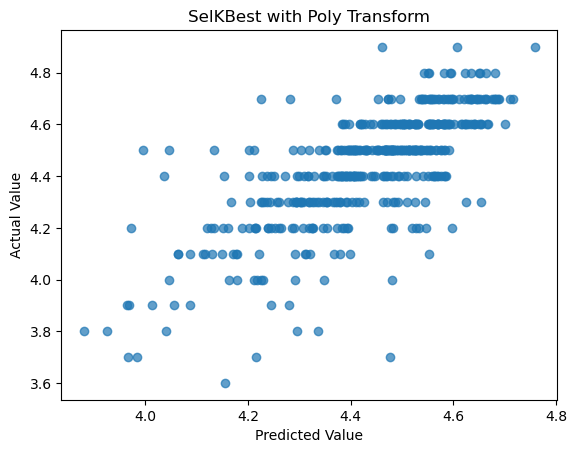

In [68]:
# build the model so I put selected model to Features part
X_train, X_test, Y_train, Y_test = train_test_split(feature, target, test_size=0.25, random_state=42)

# Ridge regression model is choosen for alpha which is in index 9
model = model_list[9]
model.fit(X_train, Y_train)

# get the predictions for the test dataset
Y_pred = model.predict(X_test)

# plot the prediction vs actual
plt.scatter(Y_pred, Y_test, alpha=0.7)
plt.title('SelKBest with Poly Transform')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

In [69]:
# coefficient list for the ridge linear model
print(pd.Series(model.coef_, index=features.columns))

last_updated            0.000659
lectures                0.000156
duration               -0.000026
discount               -0.000052
inst_rating             0.813954
cost                   -0.000441
log_enrollment          0.010993
log_number_ratings      0.008338
log_inst_review        -0.016528
log_inst_student        0.012754
business               -0.003493
design                  0.002870
development            -0.009576
it_software            -0.012190
marketing              -0.001945
office_productivity    -0.025915
personal_development    0.038051
teaching_academics      0.012198
dtype: float64


#### Findings about selected Ridge linear model: 

- Based on the above table, I believe the best model to be Ridge regression model is choosen for alpha which is in index 9. Because It has the highest R2 and the lowest RMSE. However, event with best one accuracy is so low
 
- Coefficients: The feature coefficients provide insights into the relationship between the features and the target variable. In this case, I cannot observe easily any result since that values are so similar and narrow..
 
- The linear regression scatter plot seems that points are spread out and shows some outliers.There is a weak trend and weak correlation between the predicted values (Y_pred) and the actual values (Y_test)